In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import warnings

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
import os

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/food_Dataset/Food Classification",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE )

Found 2294 files belonging to 20 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_names = dataset.class_names
class_names

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

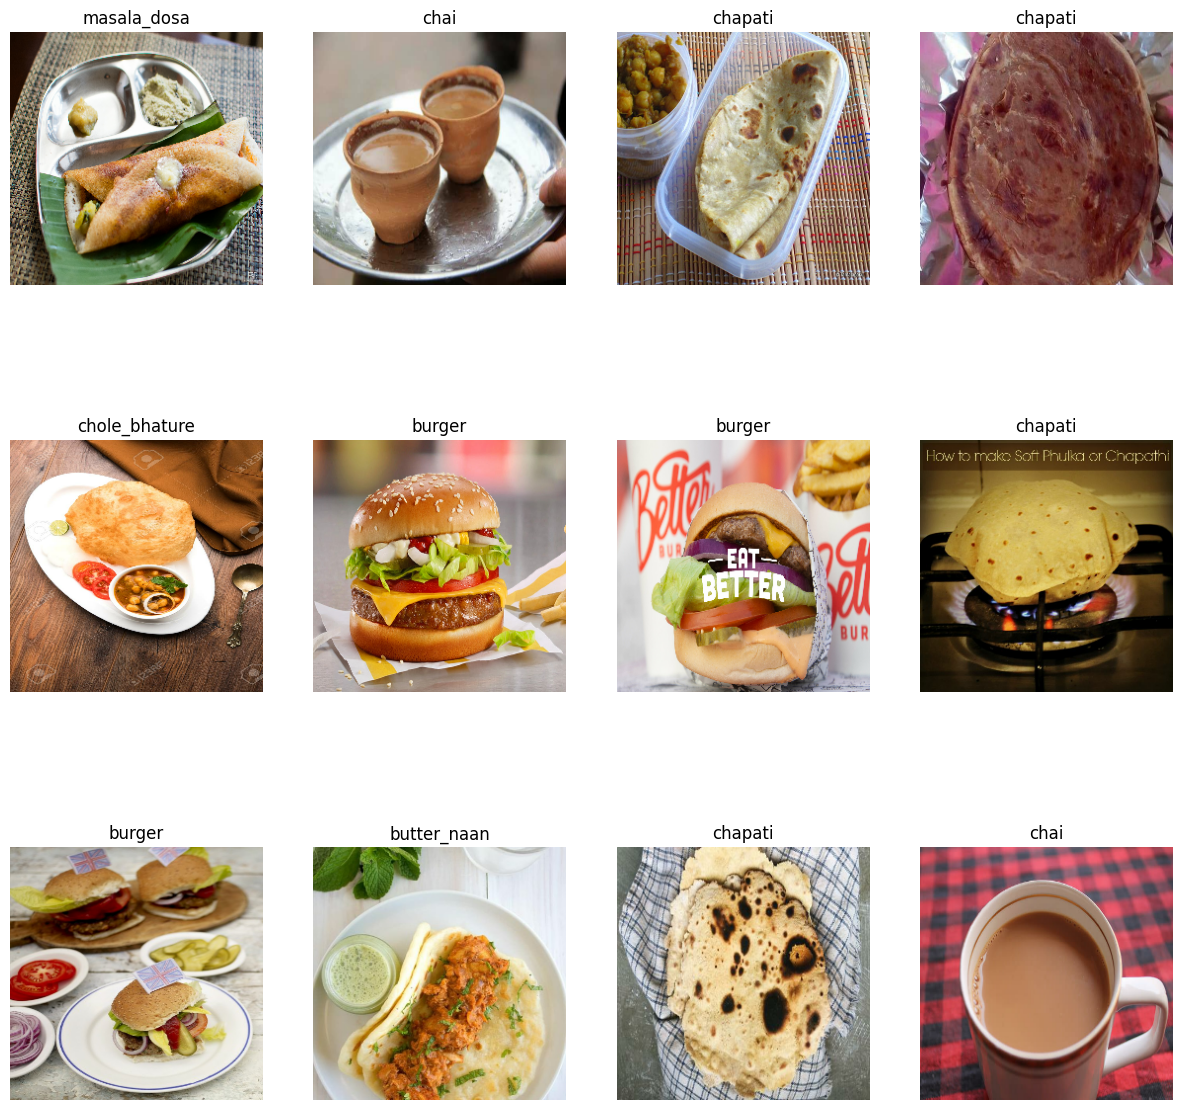

In [ ]:
plt.figure(figsize = (15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        a = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds

In [ ]:
train_ds , test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

57

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(256,256),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (32,256,256,3)
n_classes = len(class_names)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
])
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   multiple                  0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds)

Epoch 1/50
57/57 [==============================] - 402s 2s/step - loss: 2.0880 - accuracy: 0.2401 - val_loss: 1.9303 - val_accuracy: 0.3125
Epoch 2/50
57/57 [==============================] - 4s 66ms/step - loss: 1.8558 - accuracy: 0.3399 - val_loss: 1.7412 - val_accuracy: 0.3795
Epoch 3/50
57/57 [==============================] - 4s 68ms/step - loss: 1.7151 - accuracy: 0.3898 - val_loss: 1.4544 - val_accuracy: 0.4821
Epoch 4/50
57/57 [==============================] - 4s 65ms/step - loss: 1.5853 - accuracy: 0.4529 - val_loss: 1.3024 - val_accuracy: 0.5759
Epoch 5/50
57/57 [==============================] - 4s 65ms/step - loss: 1.4599 - accuracy: 0.5214 - val_loss: 1.2888 - val_accuracy: 0.5938
Epoch 6/50
57/57 [==============================] - 4s 67ms/step - loss: 1.3450 - accuracy: 0.5428 - val_loss: 1.2261 - val_accuracy: 0.5804
Epoch 7/50
57/57 [==============================] - 4s 68ms/step - loss: 1.2558 - accuracy: 0.5740 - val_loss: 1.1490 - val_accuracy: 0.6652
Epoch 8/50
57

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 51s 28ms/step - loss: 0.4790 - accuracy: 0.8789


In [ ]:
scores

[0.47899770736694336, 0.87890625]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 57}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Loss')

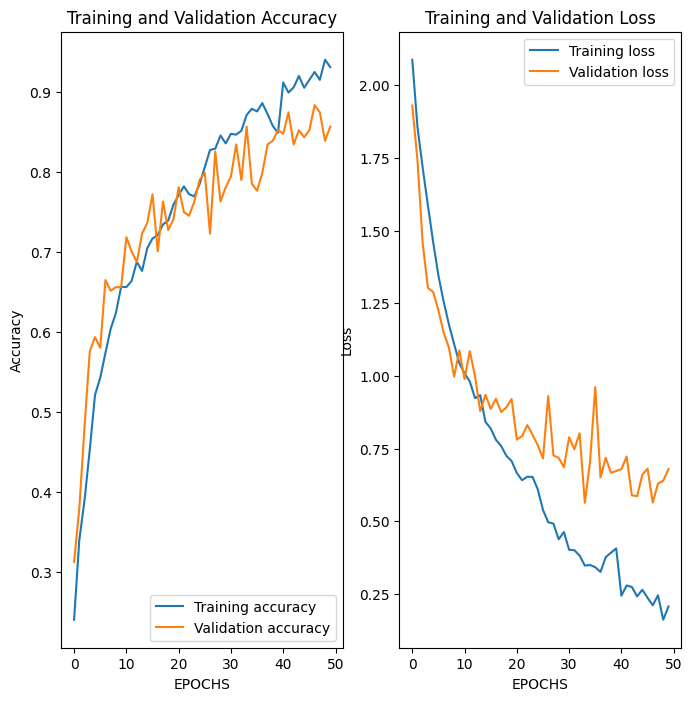

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.xlabel("EPOCHS")
plt.ylabel("Loss")



First Image to Predict:
Actual Label: chai
1/1 [==============================] - 0s 270ms/step
Predicted Label: burger
First Image to Predict:
Actual Label: burger
1/1 [==============================] - 0s 49ms/step
Predicted Label: burger
First Image to Predict:
Actual Label: chole_bhature
1/1 [==============================] - 0s 52ms/step
Predicted Label: chole_bhature
First Image to Predict:
Actual Label: chapati
1/1 [==============================] - 0s 44ms/step
Predicted Label: chapati
First Image to Predict:
Actual Label: burger
1/1 [==============================] - 0s 32ms/step
Predicted Label: burger
First Image to Predict:
Actual Label: chole_bhature
1/1 [==============================] - 0s 51ms/step
Predicted Label: chai
First Image to Predict:
Actual Label: chai
1/1 [==============================] - 0s 32ms/step
Predicted Label: chai
First Image to Predict:
Actual Label: chai
1/1 [==============================] - 0s 42ms/step
Predicted Label: chai


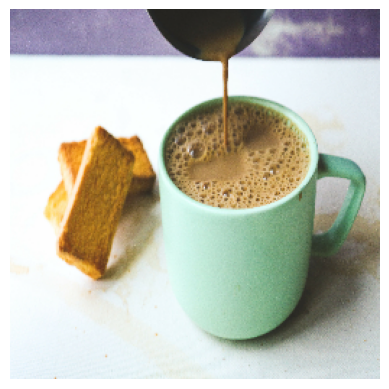

In [ ]:
import numpy as np
for image_batch,label_batch in test_ds.take(20):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First Image to Predict:")
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual Label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [ ]:
import tensorflow
tensorflow.keras.models.save_model(model,'model.pbtxt')

In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model = model)
model_tflite=converter.convert()
open("food.tflite","wb").write(model_tflite)

26237752

In [ ]:
import os
model.save("Food.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the saved model
model = tf.keras.models.load_model('Food.h5')

# Get the predicted labels for the test dataset
y_pred = []
y_true = []

for image_batch, label_batch in test_ds:
    y_pred_batch = model.predict(image_batch)
    y_pred.extend(np.argmax(y_pred_batch, axis=1))
    y_true.extend(label_batch.numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = class_names

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add labels to each cell
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
